In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

# Discrete Fourier transform

As discussed in class, the DFT is given by: 
$$ F_k=\sum_{n=0}^{N-1}f_n\exp\left(-i\frac{2\pi nk}{N}\right),$$
and its inverse by 
$$f_n=\frac{1}{N}\sum_{k=0}^{N-1}F_k \exp\left(i\frac{2\pi nk}{N}\right).$$
Note that we use the convention to associate the normalization factor $1/N$ with the inverse transform. The code a DFT is quite simple:

In [2]:
def dft(f_n):
    '''Discrete Fourier transform'''
    
    N = len(f_n)
    f_k = np.zeros((N),dtype=np.complex128)

    for k in range(N):
        for n in range(N):
            f_k[k] += f_n[n]*np.exp(-2.0*np.pi*1j*n*k/N)
        
    return f_k

def inv_dft(f_k):
    '''Inverse discrete Fourier transform'''
    
    N = len(f_k)
    f_n = np.zeros((N),dtype=np.complex128)

    for n in range(N):
        for k in range(N):
            f_n[n] += (1.0/float(N))*f_k[k]*np.exp(2.0*np.pi*1j*n*k/N)
        
    return f_n


## Test case: Periodic sine function

As a simple test case, we will take a sine function perioic over the interval 0 to `xmax`. Since the function is odd, its DFT will be purely imaginary. Note that we have two peaks, one at the frequency $k=0.2$. The other is from the complex conjugate (more below). We can take the inverse transform to recover the original function. 

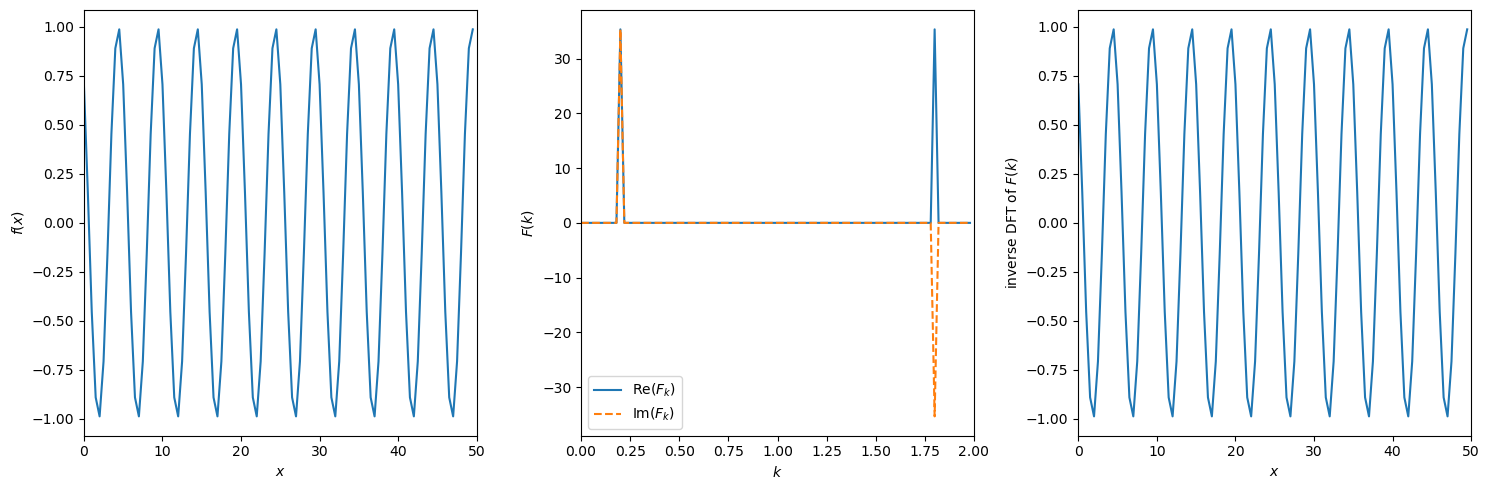

In [7]:
# Set up the function
npts=100
v0=0.2
xmax=50
x=np.linspace(0.0,xmax,npts,endpoint=False) # NO FINAL POINT: Assumed to be periodic
k = np.arange(npts)/xmax # Points in reciprocal space
f=np.cos(2*np.pi*v0*x+np.pi/4)

# Take the DFT
Fdft=dft(f)

# Take the inverse DFT (should recover f)
fdft=inv_dft(Fdft)

# Plot the results
fig1,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
ax1.plot(x,f)
ax2.plot(k,np.real(Fdft),label=r"Re($F_k$)")
ax2.plot(k,np.imag(Fdft),'--',label=r"Im($F_k$)")
ax3.plot(x,fdft.real)

ax1.set_xlim(0,xmax)
ax2.set_xlim(0,npts/xmax)
ax3.set_xlim(0,xmax)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
ax2.set_xlabel(r'$k$')
ax2.set_ylabel('$F(k)$')
ax2.legend()
ax3.set_ylabel('inverse DFT of $F(k)$')
ax3.set_xlabel('$x$')

fig1.tight_layout()

plt.savefig('sin_dft.pdf',bbox_inches='tight')
plt.show()

## DFT for real functions

If we are working with, e.g., experimental data, it is usually real. In that case, we saw in the lecture that we only need to calculate over half of the range. The other half will be the complex conjugate. Some simple implementations are given below:

In [8]:
def dft_real(f_n):
    '''Discrete Fourier transform assuming a real function'''
    N = len(f_n)
    f_k = np.zeros(N//2+1,dtype=np.complex128)

    for k in range(N//2+1): # Only need to range over half of the k's
        for n in range(N):
            f_k[k] += f_n[n]*np.exp(-2.0*np.pi*1j*n*k/N)
        
    return f_k

def inv_dft_real(f_k,npts):
    '''Inverse discrete Fourier transform assuming a real function'''
    
    # Reconstruct the full DFT. 
    # Not the most efficient way to do it, but you get the picture
    if npts%2==0: # Even number of points
        fk_recon=np.append(f_k,np.conj(np.flip(f_k[1:-1])))
    else: # odd number of points
        fk_recon=np.append(f_k,np.conj(np.flip(f_k[1:])))
        
    N = len(fk_recon)
    
    f_n = np.zeros(N,dtype=np.complex128)

    for n in range(N):
        for k in range(N):
            f_n[n] += (1/float(N))*fk_recon[k]*np.exp(2.0*np.pi*1j*n*k/N)
        
    return f_n


## Same example as above, the sine function:

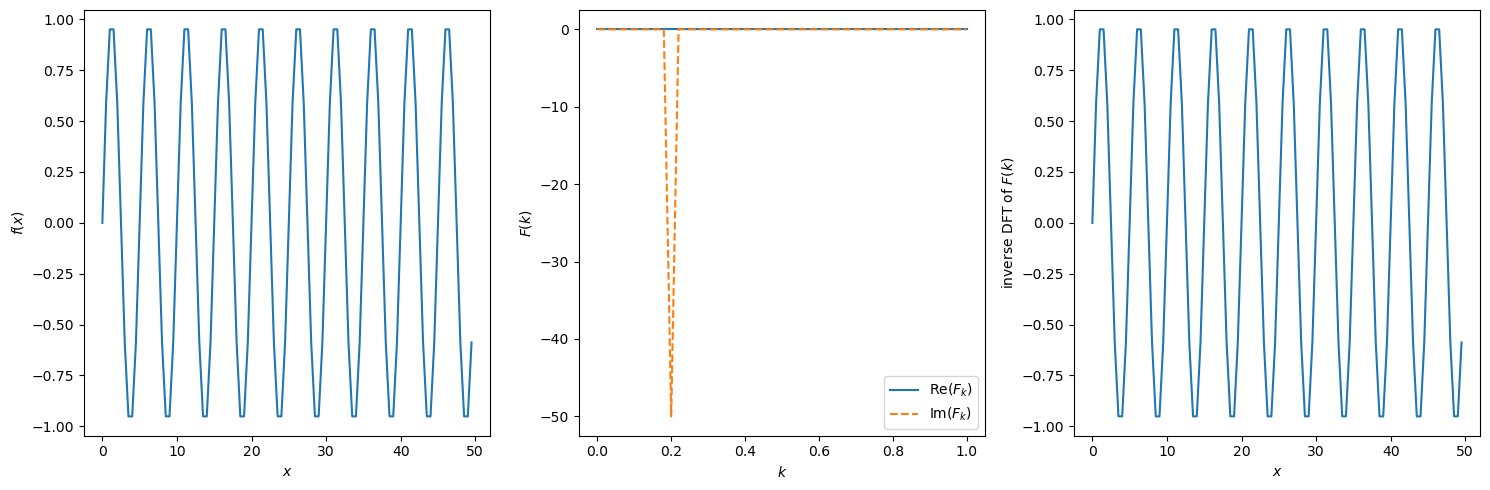

In [9]:
# Set up the function
npts=100
v0=0.2
xmax=50
x=np.linspace(0.0,xmax,npts,endpoint=False)
k = np.arange(npts//2+1)/xmax # Points in reciprocal space
f=np.sin(2*np.pi*v0*x)

# Take the DFT
Fdft=dft_real(f)

# Take the inverse DFT (should recover f)
fdft=inv_dft_real(Fdft,npts)

# Plot the results
fig1,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
ax1.plot(x,f)
ax2.plot(k,np.real(Fdft),label=r"Re($F_k$)")
ax2.plot(k,np.imag(Fdft),'--',label=r"Im($F_k$)")
ax3.plot(x,fdft.real)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
ax2.set_xlabel(r'$k$')
ax2.set_ylabel('$F(k)$')
ax2.legend()
ax3.set_ylabel('inverse DFT of $F(k)$')
ax3.set_xlabel('$x$')

fig1.tight_layout()

plt.savefig('sin_dft_real.pdf',bbox_inches='tight')
plt.show()

## Another example: Square wave

Lets take an example that does not have an such an obvious DFT. One example often invoked to demonstrate Fourier series is that of a square wave.

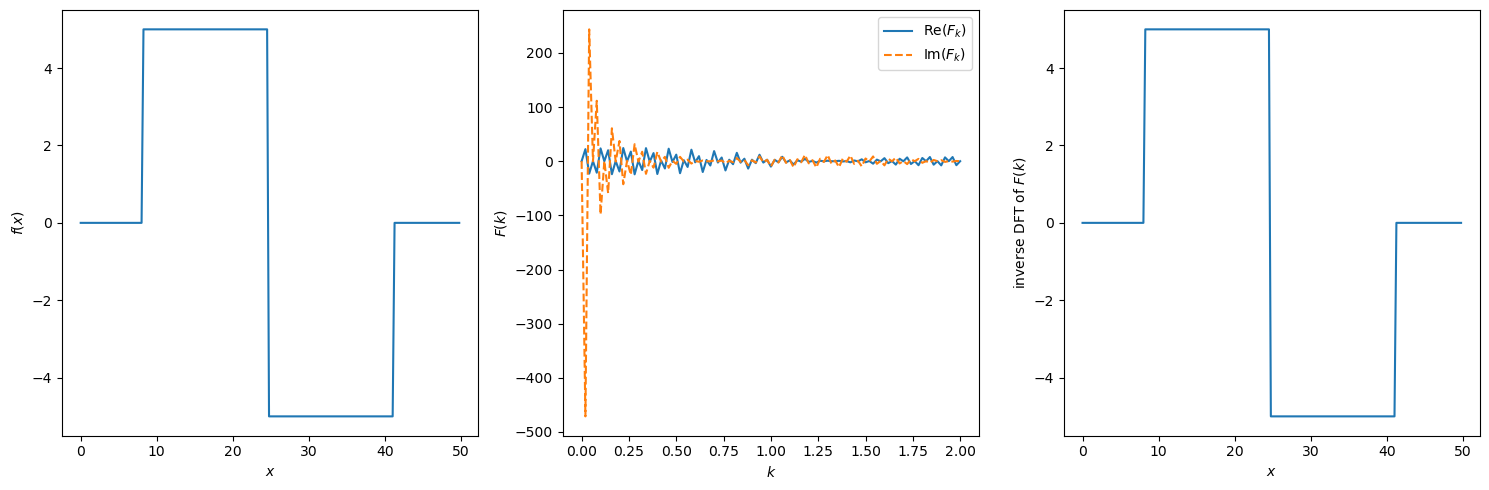

In [10]:
# Set up the function
npts=200
xmax=50
x=np.linspace(0.0,xmax,npts,endpoint=False)
k = np.arange(npts//2+1)/xmax
f=np.zeros(len(x))

sixth=int(npts/6)
f[sixth:sixth*3]=5.0
f[sixth*3:sixth*5]=-5.0

# Take the DFT and inverse
Fdft=dft_real(f)
fdft=inv_dft_real(Fdft,npts)

#Plot:
fig1,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
ax1.plot(x,f)
ax2.plot(k,np.real(Fdft),label=r"Re($F_k$)")
ax2.plot(k,np.imag(Fdft),'--',label=r"Im($F_k$)")
ax3.plot(x,fdft.real)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
ax2.set_xlabel(r'$k$')
ax2.set_ylabel('$F(k)$')
ax2.legend()
ax3.set_ylabel('inverse DFT of $F(k)$')
ax3.set_xlabel('$x$')

fig1.tight_layout()

plt.savefig('square_wave_dft.pdf',bbox_inches='tight')
plt.show()

## Using DFTs for filtering/smoothing

Sometimes, we may know the approximate frequency of the signal that we are trying to measure, but there is noise or signals at other frequencies in the data. In this case, we can filter the data, e.g., by performing a DFT and removing the contribution from other frequencies (either by setting frequency portions of the spectrum in reciprocal space to zero, or perhaps suppressing components with relatively small weight).

Lets look at the trivial example of a combination of three sine waves with different frequency:

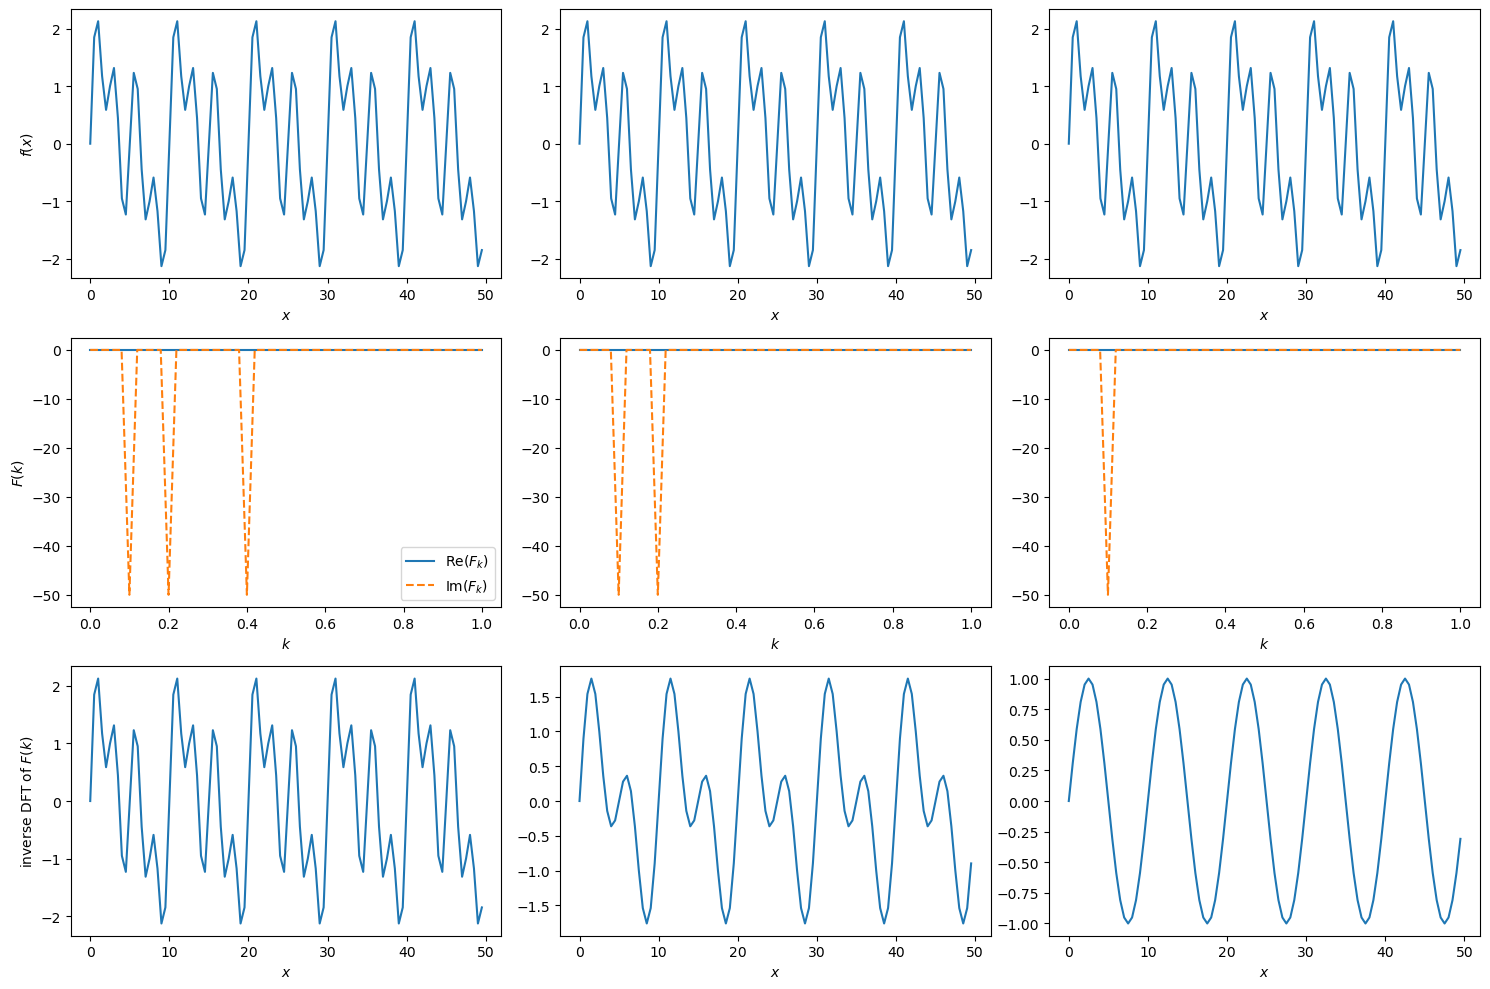

In [11]:
# Set up the function

npts=100
xmax=50
x=np.linspace(0.0,xmax,npts,endpoint=False)
k = np.arange(npts//2+1)/xmax
f=np.sin(2*np.pi*0.1*x)+np.sin(2*np.pi*0.2*x)+np.sin(2*np.pi*0.4*x)

# Perform the DFT and inverse
Fdft=dft_real(f)
fdft=inv_dft_real(Fdft,npts)

# Apply filters: Remove the contribution to the DFT from one sine function at a time
Fdft_filter1=np.copy(Fdft)
Fdft_filter2=np.copy(Fdft)
Fdft_filter1[15:]=0.0
Fdft_filter2[7:]=0.0

# Perform the inverse DFT on filterd functions
fdft_filter1=inv_dft_real(Fdft_filter1,npts)
fdft_filter2=inv_dft_real(Fdft_filter2,npts)

# Plots
fig1,((ax1,ax2,ax3),(ax21,ax22,ax23),(ax31,ax32,ax33))=plt.subplots(3,3,figsize=(15,10))
ax1.plot(x,f)
ax2.plot(x,f)
ax3.plot(x,f)

ax21.plot(k,np.real(Fdft),label=r"Re($F_k$)")
ax21.plot(k,np.imag(Fdft),'--',label=r"Im($F_k$)")
ax31.plot(x,fdft.real)

ax22.plot(k,np.real(Fdft_filter1),label=r"Re($F_k$)")
ax22.plot(k,np.imag(Fdft_filter1),'--',label=r"Im($F_k$)")
ax32.plot(x,fdft_filter1.real)

ax23.plot(k,np.real(Fdft_filter2),label=r"Re($F_k$)")
ax23.plot(k,np.imag(Fdft_filter2),'--',label=r"Im($F_k$)")
ax33.plot(x,fdft_filter2.real)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
ax2.set_xlabel('$x$')
ax3.set_xlabel('$x$')
ax31.set_xlabel('$x$')

ax21.set_xlabel(r'$k$')
ax21.set_ylabel('$F(k)$')
ax22.set_xlabel(r'$k$')
ax23.set_xlabel(r'$k$')


ax31.set_ylabel('inverse DFT of $F(k)$')
ax32.set_xlabel('$x$')
ax33.set_xlabel('$x$')

ax21.legend()

fig1.tight_layout()

plt.savefig('sine_filter.pdf',bbox_inches='tight')
plt.show()


### Sine function with noise:
We can also look at a sine function with some background noise. In this case, we remove high-frequency components from the DFT.

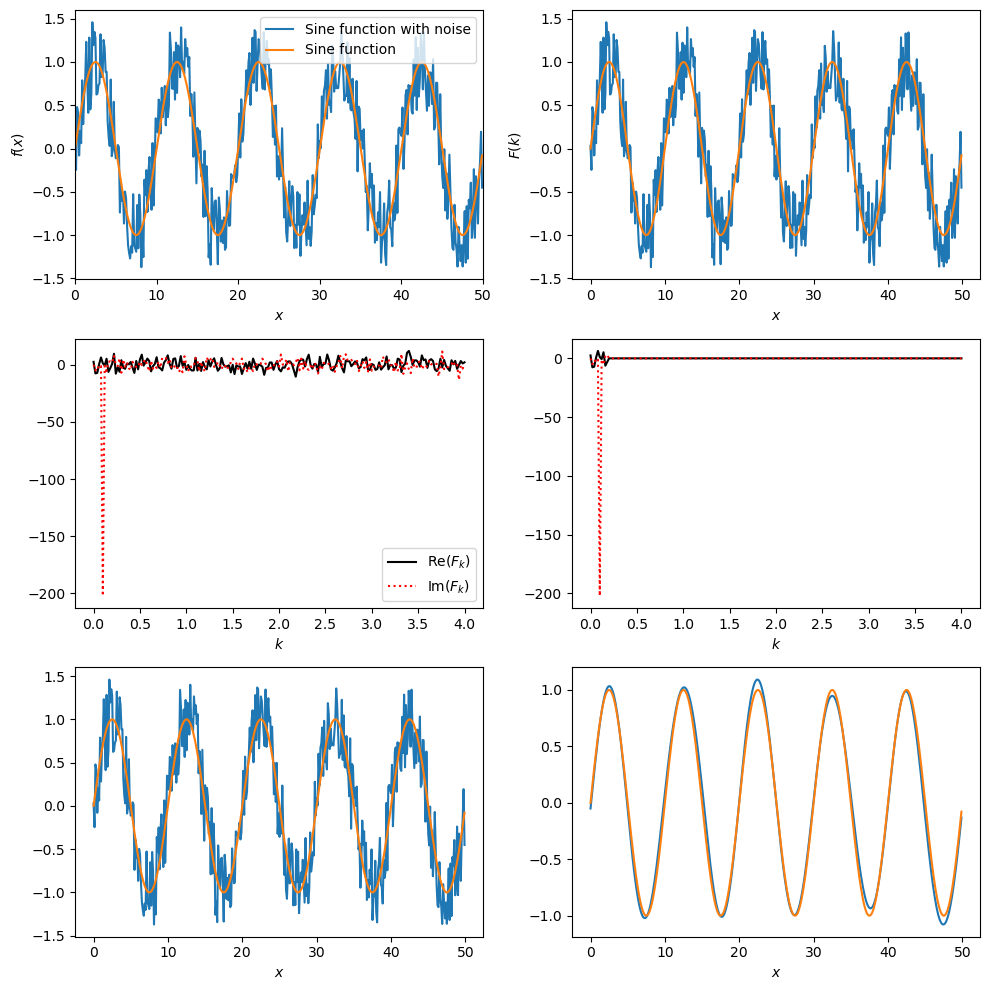

In [12]:
def noisy_y(level,y):
    '''Function to add noise'''
    
    for point in range(len(y)):
        y[point]+=level*(np.random.rand(1)-0.5)
        
    return y

# Set up the noisy sine function
npts=400
xmax=50
x=np.linspace(0.0,xmax,npts,endpoint=False)
k = np.arange(npts//2+1)/xmax
f=np.sin(2*np.pi*0.1*x)
f=noisy_y(1,f)


# Take the DFT and inverse
Fdft=dft_real(f)
fdft=inv_dft_real(Fdft,npts)

# Filter by removing high frequency contributions 
Fdft_filter=np.copy(Fdft)
Fdft_filter[10:]=0.0+0.0*1j

# Inverse DFT filtered version
fdft_filter=inv_dft_real(Fdft_filter,npts)

# Plot:
fig1,((ax1,ax2),(ax21,ax22),(ax31,ax32))=plt.subplots(3,2,figsize=(10,10))

ax1.plot(x,f,label='Sine function with noise')
ax1.plot(x,np.sin(2*np.pi*0.1*x),label='Sine function')
ax2.plot(x,f)
ax2.plot(x,np.sin(2*np.pi*0.1*x))


ax21.plot(k,np.real(Fdft),'k',label=r"Re($F_k$)")
ax21.plot(k,np.imag(Fdft),'r:',label=r"Im($F_k$)")
ax31.plot(x,fdft.real)
ax31.plot(x,np.sin(2*np.pi*0.1*x))

ax22.plot(k,np.real(Fdft_filter),'k',label=r"Re($F_k$)")
ax22.plot(k,np.imag(Fdft_filter),'r:',label=r"Im($F_k$)")
ax32.plot(x,fdft_filter.real)
ax32.plot(x,np.sin(2*np.pi*0.1*x))

ax1.set_xlim(0,xmax)
#ax2.set_xlim(0,npts/xmax)
ax3.set_xlim(0,xmax)

ax1.set_xlabel('$x$')
ax2.set_xlabel('$x$')
ax31.set_xlabel('$x$')
ax32.set_xlabel('$x$')
ax21.set_xlabel(r'$k$')
ax22.set_xlabel(r'$k$')

ax1.set_ylabel('$f(x)$')

ax2.set_ylabel('$F(k)$')

ax1.legend()
ax21.legend()

fig1.tight_layout()

plt.savefig('sin_dft_noise.pdf',bbox_inches='tight')
plt.show()

### Error function with noise:

A tougher example, a square(ish) signal made friom error functions. We will filter out components in the DFT with relatively small magnitude.

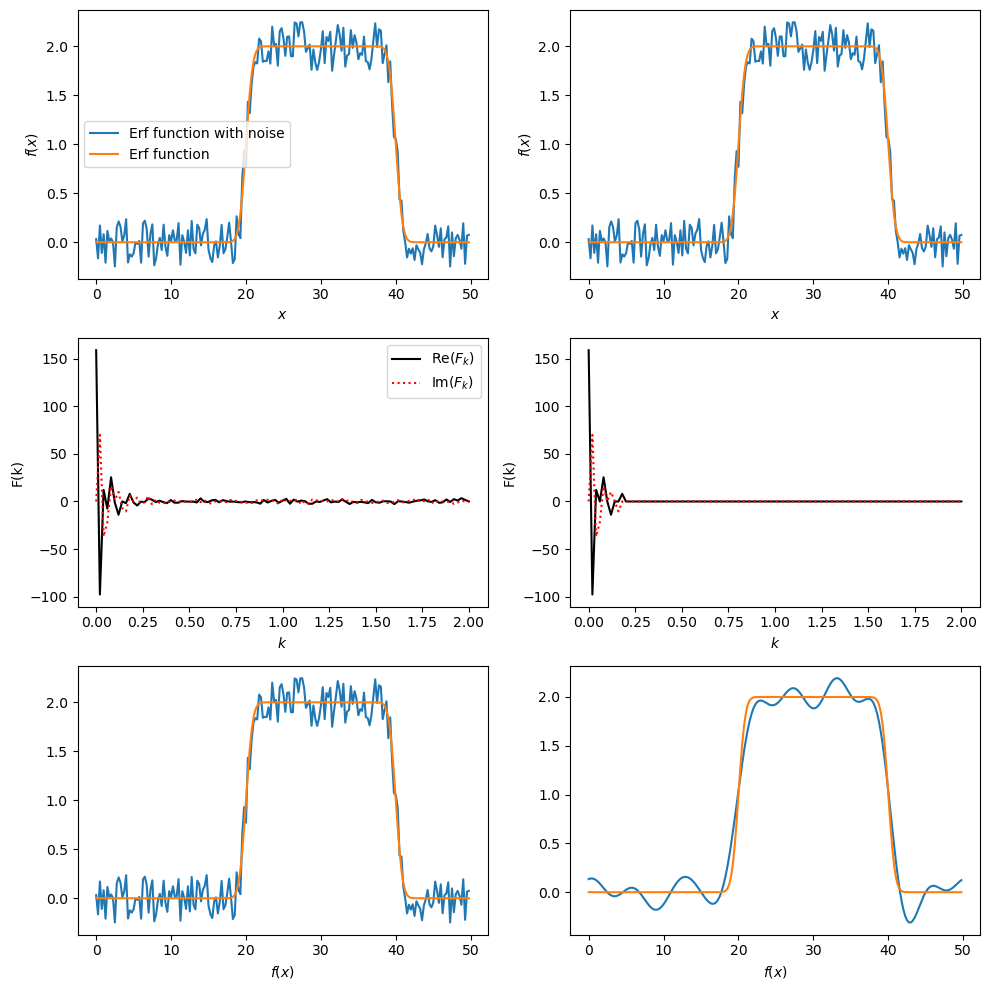

In [13]:
def filt(level,Fk):
    '''Function to filter out contributions in DFT below certain level'''
    for kpt in range(len(Fk)):
        if abs(Fk[kpt].real) < level:  Fk[kpt]=0.0+Fk[kpt].imag*1j
        if abs(Fk[kpt].imag) < level:  Fk[kpt]=Fk[kpt].real+0.0*1j
    return Fk

# Set up the function
npts=200
xmax=50
x=np.linspace(0.0,xmax,npts,endpoint=False)
k = np.arange(npts//2+1)/xmax
f=sp.erf(x-20)-sp.erf(x-40)

# Uses noise function from above
f=noisy_y(0.5,f)

# DFT and inverse
Fdft=dft_real(f)
fdft=inv_dft_real(Fdft,npts)

# DFT, filtering, then inverse
Fdft_filter=np.copy(Fdft)
Fdft_filter=filt(8.0,Fdft_filter)
fdft_filter=inv_dft_real(Fdft_filter,npts)

# Plot:
fig1,((ax1,ax2),(ax21,ax22),(ax31,ax32))=plt.subplots(3,2,figsize=(10,10))

ax1.plot(x,f,label='Erf function with noise')
ax1.plot(x,sp.erf(x-20)-sp.erf(x-40),label='Erf function')
ax2.plot(x,f)
ax2.plot(x,sp.erf(x-20)-sp.erf(x-40))


ax21.plot(k,np.real(Fdft),'k',label=r"Re($F_k$)")
ax21.plot(k,np.imag(Fdft),'r:',label=r"Im($F_k$)")
ax31.plot(x,fdft.real)
ax31.plot(x,sp.erf(x-20)-sp.erf(x-40))

ax22.plot(k,np.real(Fdft_filter),'k',label=r"Re($F_k$)")
ax22.plot(k,np.imag(Fdft_filter),'r:',label=r"Im($F_k$)")
ax32.plot(x,fdft_filter.real)
ax32.plot(x,sp.erf(x-20)-sp.erf(x-40))

ax1.set_xlabel('$x$')
ax2.set_xlabel('$x$')
ax31.set_xlabel('$x$')
ax32.set_xlabel('$x$')
ax21.set_xlabel(r'$k$')
ax22.set_xlabel(r'$k$')

ax1.set_ylabel('$f(x)$')
ax2.set_ylabel('$f(x)$')
ax21.set_ylabel('F(k)')
ax22.set_ylabel('F(k)')
ax31.set_xlabel('$f(x)$')
ax32.set_xlabel('$f(x)$')

ax1.legend()
ax21.legend()

fig1.tight_layout()

plt.savefig('erf_dft_noise.pdf',bbox_inches='tight')
plt.show()